Plot for complete markets

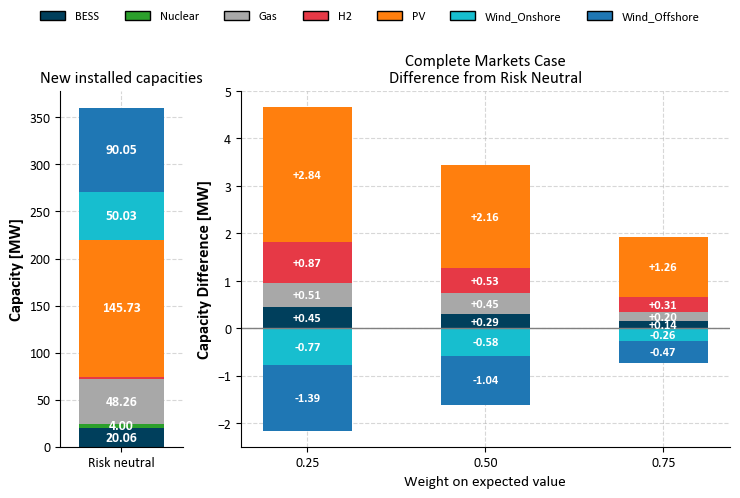

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
df_raw = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\risk_aversion_results_O30_T672_new_final_unserved_fix_flex_gaspricescaled_cinvEldescheap_conwind.csv")
df = df_raw[df_raw["delta"] != 0]

# === Filter relevant columns ===
capacity_cols = ['PV', 'Gas', 'Wind_Onshore', 'Wind_Offshore', 'Nuclear', 'BESS_P', 'H2_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Nuclear',  'Gas', 'H2_P', 'PV', 'Wind_Onshore', 'Wind_Offshore']
labels = ['BESS', 'Nuclear',  'Gas', 'H2', 'PV', 'Wind_Onshore', 'Wind_Offshore']
#techs = ['BESS_P', 'LDES_PHS_P']
#labels = ['BESS', 'PHS']
#colors = {
#    'BESS_P': '#4e79a7',       # Blue
#    'Wind_Offshore': '#af7aa1',          # Violet
#    'Nuclear': "#73ef63",      # Gray
#    'LDES_PHS_P': '#e15759',   # Red
#    'PV': '#f28e2b',           # Orange
#    'Wind_Onshore': '#76c7c0',         # Teal
#    'Gas': "#bab0ac"
#}
colors = {
    'BESS_P': '#003f5c',         # Blue
    'Nuclear': '#2ca02c',        # Green
    'Gas': '#a8a8a8',            # Light Gray
    'H2_P': '#e63946',     # Lighter Red
    'PV': '#ff7f0e',  #ff9933           # Orange
    'Wind_Onshore': '#17becf',   # Teal-Cyan
    'Wind_Offshore': '#1f77b4'   # Slightly darker Teal-Cyan
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 5), gridspec_kw={'width_ratios': [1, 4]}) # itan 1 4

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.35
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0.25, value, width=bar_width, bottom=bottom, color=colors[tech])
    #ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 3.1:
        ax1.text(0.25, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    bottom += value
ax1.set_xticks([0.25])
ax1.set_xlim(0, 0.5)
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("New installed capacities", fontsize=12, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0.01:
            #ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            
            if abs(diff) > 0.04 and abs(diff) < 0.1:
                ax2.text(x[i], bottom_pos[i] + diff / 20, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            else:
                ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.9 and abs(diff) > 0.5:
            #    ax2.text(x[i], bottom_pos[i] + diff / 3.5, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.5 and abs(diff) > 0.3:
            #    ax2.text(x[i], bottom_pos[i] - diff/10 , f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_pos[i] += diff
        else:
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            #ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.2f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight on expected value", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Complete Markets Case\nDifference from Risk Neutral", fontsize=12, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

from matplotlib.patches import Rectangle
import matplotlib.lines as mlines

# === Legend ===
#handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
#fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)
handles = [Rectangle((0, 0), 1, 1, facecolor=colors[t], edgecolor='black') for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

fig.savefig("complete.png", dpi=400, bbox_inches='tight')

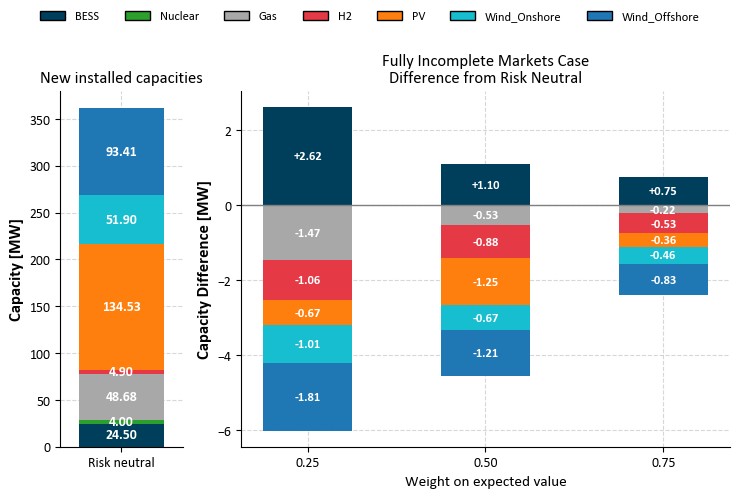

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
df_raw = pd.read_csv(r"C:\Users\user\Downloads\trycodes_3\H2_15000_ADMM_risk_aversion_results_O30_T672_new_final.csv")
df = df_raw[df_raw["delta"] != 0]

# === Filter relevant columns ===
capacity_cols = ['PV', 'Gas', 'Wind_Onshore', 'Wind_Offshore', 'Nuclear', 'BESS_P', 'H2_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Nuclear',  'Gas', 'H2_P', 'PV', 'Wind_Onshore', 'Wind_Offshore']
labels = ['BESS', 'Nuclear',  'Gas', 'H2', 'PV', 'Wind_Onshore', 'Wind_Offshore']
#techs = ['BESS_P', 'LDES_PHS_P']
#labels = ['BESS', 'PHS']
#colors = {
#    'BESS_P': '#4e79a7',       # Blue
#    'Wind_Offshore': '#af7aa1',          # Violet
#    'Nuclear': "#73ef63",      # Gray
#    'LDES_PHS_P': '#e15759',   # Red
#    'PV': '#f28e2b',           # Orange
#    'Wind_Onshore': '#76c7c0',         # Teal
#    'Gas': "#bab0ac"
#}
colors = {
    'BESS_P': '#003f5c',         # Blue
    'Nuclear': '#2ca02c',        # Green
    'Gas': '#a8a8a8',            # Light Gray
    'H2_P': '#e63946',     # Lighter Red
    'PV': '#ff7f0e',  #ff9933           # Orange
    'Wind_Onshore': '#17becf',   # Teal-Cyan
    'Wind_Offshore': '#1f77b4'   # Slightly darker Teal-Cyan
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 5), gridspec_kw={'width_ratios': [1, 4]}) # itan 1 4

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.35
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0.25, value, width=bar_width, bottom=bottom, color=colors[tech])
    #ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 3.1:
        ax1.text(0.25, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    bottom += value
ax1.set_xticks([0.25])
ax1.set_xlim(0, 0.5)
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("New installed capacities", fontsize=12, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0.01:
            #ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            
            if abs(diff) > 0.04 and abs(diff) < 0.1:
                ax2.text(x[i], bottom_pos[i] + diff / 20, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            else:
                ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.9 and abs(diff) > 0.5:
            #    ax2.text(x[i], bottom_pos[i] + diff / 3.5, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.5 and abs(diff) > 0.3:
            #    ax2.text(x[i], bottom_pos[i] - diff/10 , f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_pos[i] += diff
        else:
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            #ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.2f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight on expected value", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Fully Incomplete Markets Case\nDifference from Risk Neutral", fontsize=12, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

from matplotlib.patches import Rectangle
import matplotlib.lines as mlines

# === Legend ===
#handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
#fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)
handles = [Rectangle((0, 0), 1, 1, facecolor=colors[t], edgecolor='black') for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

fig.savefig("inomplete.png", dpi=400, bbox_inches='tight')

| Metric         | Based on          | What it Tells You                                                                            |
| -------------- | ----------------- | -------------------------------------------------------------------------------------------- |
| `total_demand` | `weighted_demand` | Total energy consumed over the year (in MWh), accounting for weights (e.g., time fractions). |
| `max_load`     | `load`            | Highest instantaneous demand (e.g., peak in MW).                                             |
| `min_load`     | `load`            | Lowest observed demand.                                                                      |
| `mean_load`    | `load`            | Average demand across all time steps.                                                        |
| `median_load`  | `load`            | The "middle" value — half the values are above, half below.                                  |
| `std_load`     | `load`            | Standard deviation — how much demand fluctuates around the mean.                             |
| `range_load`   | `load`            | Difference between max and min — indicates spread.                                           |
| `p10_load`     | `load`            | 10th percentile — 10% of values are below this.                                              |
| `p90_load`     | `load`            | 90th percentile — 90% of values are below this.                                              |


In [6]:

import pandas as pd
import numpy as np

# Weighted std function
def weighted_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values - average) ** 2, weights=weights)
    return np.sqrt(variance)

# Weighted quantile function
def weighted_quantile(values, weights, quantile):
    values = np.array(values)
    weights = np.array(weights)
    
    sorter = np.argsort(values)
    values = values[sorter]
    weights = weights[sorter]
    
    cumulative_weight = np.cumsum(weights)
    total_weight = cumulative_weight[-1]
    
    return values[np.searchsorted(cumulative_weight, quantile * total_weight)]


# Load the uploaded data
load_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\data\concatenated_load_profiles_672_30yr_new.csv")
weights_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\data\concatenated_weights_672_30yr_new.csv")

# Merge load and weight data
merged_df = pd.merge(load_df, weights_df, on=["T", "O"], how="inner")

# Compute weighted demand per timestep
merged_df["weighted_demand"] = merged_df["load"] * merged_df["weight"]

# Now build demand_stats with weighted metrics
demand_stats = (
    merged_df.groupby("O")
    .apply(lambda group: pd.Series({
        "total_demand": group["weighted_demand"].sum(),
        "total_weight": group["weight"].sum(),
        "average_load": group["weighted_demand"].sum() / group["weight"].sum(),
        "max_load": group["load"].max(),
        "min_load": group["load"].min(),
        #"mean_load": np.average(group["load"], weights=group["weight"]),
        "std_load": weighted_std(group["load"], group["weight"]),
        "range_load": group["load"].max() - group["load"].min(),
        "p10_load": weighted_quantile(group["load"], group["weight"], 0.10),
        "p90_load": weighted_quantile(group["load"], group["weight"], 0.90),
    }))
    .reset_index()
)

print(demand_stats)
demand_stats.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\demand_stats.csv", index=False)
# Define the tail scenarios
tail_scenarios = {2, 3, 6, 9, 10, 14, 15, 17, 18, 19, 20, 21, 25, 28}

# First, calculate total demand per scenario
total_demand_per_scenario = (
    merged_df.groupby("O", as_index=False)["weighted_demand"]
    .sum()
    .rename(columns={"weighted_demand": "total_demand"})
)
#print(total_demand_per_scenario)
# Split the scenarios
tail_df = total_demand_per_scenario[total_demand_per_scenario["O"].isin(tail_scenarios)]
non_tail_df = total_demand_per_scenario[~total_demand_per_scenario["O"].isin(tail_scenarios)]

# Calculate average total demand for each group
average_tail_demand = tail_df["total_demand"].mean()
average_non_tail_demand = non_tail_df["total_demand"].mean()

print("Average total demand (tail scenarios):", average_tail_demand)
print("Average total demand (non-tail scenarios):", average_non_tail_demand)


     O  total_demand  total_weight  average_load  max_load  min_load  \
0    1   5795.866199        8760.0      0.661629  0.935079  0.426762   
1    2   5694.585716        8760.0      0.650067  0.926317  0.444177   
2    3   5626.716457        8760.0      0.642319  0.931598  0.428581   
3    4   5815.532696        8760.0      0.663874  0.925387  0.444527   
4    5   5693.382130        8760.0      0.649929  0.946325  0.437674   
5    6   5495.396293        8760.0      0.627328  0.933371  0.396539   
6    7   5723.973734        8760.0      0.653422  0.927324  0.439406   
7    8   5764.580473        8760.0      0.658057  0.935021  0.446177   
8    9   5542.032482        8760.0      0.632652  0.907647  0.419137   
9   10   5542.032481        8760.0      0.632652  0.908546  0.439515   
10  11   5723.973734        8760.0      0.653422  0.938159  0.449913   
11  12   5723.973734        8760.0      0.653422  0.943096  0.440099   
12  13   5815.532695        8760.0      0.663874  0.928620  0.47

C:\Users\user\AppData\Local\Temp\ipykernel_33788\3211113593.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.Series({


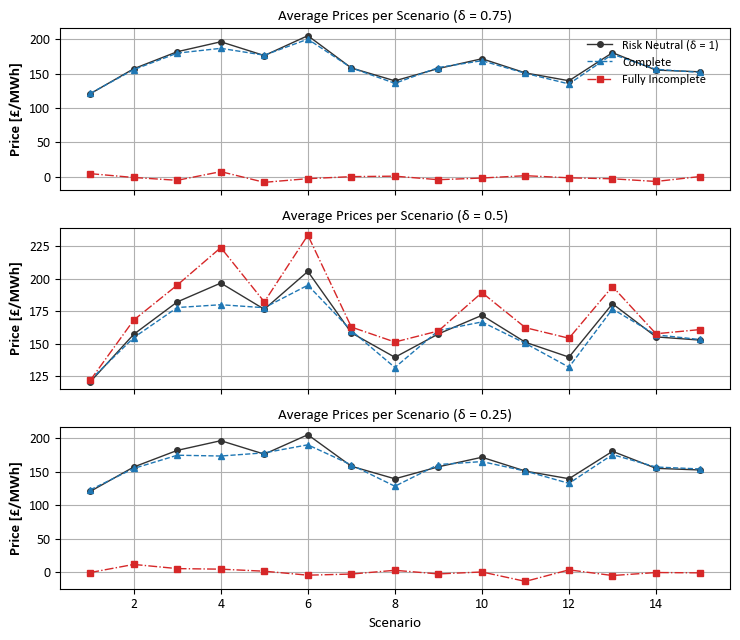

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

scenarios = np.arange(1, 16)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = [
    120.8855,  # Scenario 1
    157.3509,  # Scenario 4
    182.1469,  # Scenario 7
    196.5904,  # Scenario 8
    176.4971,  # Scenario 11
    205.4936,  # Scenario 12
    158.4395,  # Scenario 13
    139.7145,  # Scenario 19
    157.6293,  # Scenario 22
    171.8752,  # Scenario 23
    151.2024,  # Scenario 24
    139.8418,  # Scenario 26
    180.7323,  # Scenario 27
    155.3469,  # Scenario 29
    152.9040   # Scenario 30
]
price_complete_075 = [
    121.3414,  # Scenario 1
    156.0683,  # Scenario 4
    180.0571,  # Scenario 7
    187.0488,  # Scenario 8
    177.0477,  # Scenario 11
    200.4178,  # Scenario 12
    158.6189,  # Scenario 13
    136.0942,  # Scenario 19
    159.1142,  # Scenario 22
    169.0297,  # Scenario 23
    150.6668,  # Scenario 24
    135.1878,  # Scenario 26
    178.4729,  # Scenario 27
    156.4974,  # Scenario 29
    152.0604   # Scenario 30
]
price_incomplete_075 = np.random.normal(0, 5, 15)
price_complete_050 = [
    122.2688,  # Scenario 1
    154.8055,  # Scenario 4
    177.8473,  # Scenario 7
    179.9779,  # Scenario 8
    177.7166,  # Scenario 11
    194.9383,  # Scenario 12
    160.1560,  # Scenario 13
    131.8733,  # Scenario 19
    160.1837,  # Scenario 22
    166.8051,  # Scenario 23
    150.3419,  # Scenario 24
    132.1367,  # Scenario 26
    176.7039,  # Scenario 27
    156.8883,  # Scenario 29
    153.3610   # Scenario 30
]
price_incomplete_050 = [
    122.0735,  # Scenario 1
    168.2576,  # Scenario 4
    195.0704,  # Scenario 7
    223.7529,  # Scenario 8
    182.1576,  # Scenario 11
    233.2616,  # Scenario 12
    162.8601,  # Scenario 13
    151.4084,  # Scenario 19
    159.887,  # Scenario 22
    189.293,  # Scenario 23
    162.3917,  # Scenario 24
    154.3101,  # Scenario 26
    193.9301,  # Scenario 27
    157.7401,  # Scenario 29
    160.9143   # Scenario 30
]
price_complete_025 = [
    123.2041,  # Scenario 1
    155.2124,  # Scenario 4
    174.8955,  # Scenario 7
    173.7197,  # Scenario 8
    178.4617,  # Scenario 11
    190.4364,  # Scenario 12
    160.4389,  # Scenario 13
    128.6188,  # Scenario 19
    160.9868,  # Scenario 22
    165.4314,  # Scenario 23
    151.2388,  # Scenario 24
    132.9228,  # Scenario 26
    175.8153,  # Scenario 27
    157.2953,  # Scenario 29
    154.4357   # Scenario 30
]
price_incomplete_025 = np.random.normal(0, 5, 15)
# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 6.5), sharex=True)

# Common styling
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Fully Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o', 'label': 'Risk Neutral (δ = 1)'},
    'Complete': {'marker': '^', 'label': 'Complete'},
    'Fully Incomplete': {'marker': 's', 'label': 'Fully Incomplete'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',   
    'Fully Incomplete': '#d62728'  
}

def plot_lines(ax, delta, comp, incomp):
    ax.plot(scenarios, price_risk_neutral,
            linewidth=1,
            linestyle=line_styles['Risk Neutral'],
            color=colors['Risk Neutral'],
            marker=markers['Risk Neutral']['marker'],
            markersize=4,
            label=markers['Risk Neutral']['label'])

    ax.plot(scenarios, comp,
            linewidth=1,
            linestyle=line_styles['Complete'],
            color=colors['Complete'],
            marker=markers['Complete']['marker'],
            markersize=4,
            label=markers['Complete']['label'])

    ax.plot(scenarios, incomp,
            linewidth=1,
            linestyle=line_styles['Fully Incomplete'],
            color=colors['Fully Incomplete'],
            marker=markers['Fully Incomplete']['marker'],
            markersize=4,
            label=markers['Fully Incomplete']['label'])
    ax.set_ylabel("Price [$/MWh]", fontsize=11, fontweight='bold')
    ax.set_title(f"Average Prices per Scenario (δ = {delta})", fontsize=11, fontweight='normal')
    ax.grid(True)

# Plot each subplot
plot_lines(axs[0], 0.75, price_complete_075, price_incomplete_075)
plot_lines(axs[1], 0.50, price_complete_050, price_incomplete_050)
plot_lines(axs[2], 0.25, price_complete_025, price_incomplete_025)
axs[2].set_xlabel("Scenario", fontsize=11, fontweight='normal')

# Legend only on top subplot
axs[0].legend(loc='upper right', ncol=1, frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18604\1230381012.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


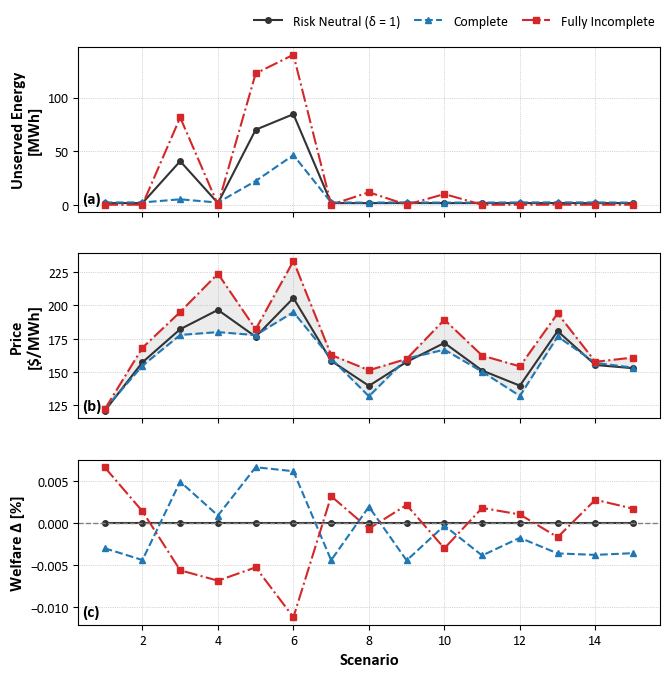

'\n# === Legend only at top subplot ===\n#axs[0].legend( loc=\'upper right\',frameon=True, ncol=1, prop=font_legend)\naxs[0].legend( frameon=True, ncol=1, prop=font_legend)\n\n# === Final Layout ===\nplt.tight_layout()\n\n# === Optional: Save as High-Res PDF ===\n# plt.savefig("market_comparison.pdf", dpi=300, bbox_inches=\'tight\')\n\nplt.show()\n'

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['text.usetex'] = False
rcParams['axes.labelweight'] = 'bold'

# === Font Settings ===
font_label = {'fontsize': 12, 'fontweight': 'bold'}
font_tick = {'labelsize': 10}
font_legend = FontProperties(size=10)


scenarios = np.arange(1, 16)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = [
    120.8855,  # Scenario 1
    157.3509,  # Scenario 4
    182.1469,  # Scenario 7
    196.5904,  # Scenario 8
    176.4971,  # Scenario 11
    205.4936,  # Scenario 12
    158.4395,  # Scenario 13
    139.7145,  # Scenario 19
    157.6293,  # Scenario 22
    171.8752,  # Scenario 23
    151.2024,  # Scenario 24
    139.8418,  # Scenario 26
    180.7323,  # Scenario 27
    155.3469,  # Scenario 29
    152.9040   # Scenario 30
]

price_complete_050 = [
    122.2688,  # Scenario 1
    154.8055,  # Scenario 4
    177.8473,  # Scenario 7
    179.9779,  # Scenario 8
    177.7166,  # Scenario 11
    194.9383,  # Scenario 12
    160.1560,  # Scenario 13
    131.8733,  # Scenario 19
    160.1837,  # Scenario 22
    166.8051,  # Scenario 23
    150.3419,  # Scenario 24
    132.1367,  # Scenario 26
    176.7039,  # Scenario 27
    156.8883,  # Scenario 29
    153.3610   # Scenario 30
]
price_incomplete_050 = [
    122.0735,  # Scenario 1
    168.2576,  # Scenario 4
    195.0704,  # Scenario 7
    223.7529,  # Scenario 8
    182.1576,  # Scenario 11
    233.2616,  # Scenario 12
    162.8601,  # Scenario 13
    151.4084,  # Scenario 19
    159.887,  # Scenario 22
    189.293,  # Scenario 23
    162.3917,  # Scenario 24
    154.3101,  # Scenario 26
    193.9301,  # Scenario 27
    157.7401,  # Scenario 29
    160.9143   # Scenario 30
]

UE_risk_neutral = [
    1.5110558216630565,  # Scenario 1
    1.5163635270017153,  # Scenario 4
    40.641825409539244,  # Scenario 7
    1.5026785064877402,  # Scenario 8
    70.01389009326336,   # Scenario 11
    84.52377362180289,   # Scenario 12
    1.516365224640765,   # Scenario 13
    1.4838838513365857,  # Scenario 19
    1.5472605028005688,  # Scenario 22
    1.5027140814828428,  # Scenario 23
    1.502663795382098,   # Scenario 24
    1.5110671467129322,  # Scenario 26
    1.5472782128457752,  # Scenario 27
    1.5110735618782627,  # Scenario 29
    1.502664569462972    # Scenario 30
]
UE_complete_050 = [
    2.1370470956589216,  # Scenario 1
    2.1445191082245643,  # Scenario 4
    5.054340506309416,   # Scenario 7
    1.99279959312652,    # Scenario 8
    22.148770762349507,  # Scenario 11
    46.31399755663043,   # Scenario 12
    2.144671836768218,   # Scenario 13
    1.9682743600030292,  # Scenario 19
    2.1845031644582136,  # Scenario 22
    1.9929044956090465,  # Scenario 23
    2.0268083221990665,  # Scenario 24
    2.137317807152421,   # Scenario 26
    2.184862167243736,   # Scenario 27
    2.1376927272441435,  # Scenario 29
    1.9929760843497704   # Scenario 30
]
UE_incomplete_050 = [
    1.4898233544613504e-6,  # Scenario 1
    1.4992242540756706e-6,  # Scenario 4
    81.45781628327708,      # Scenario 7
    1.5031979572199816e-6,  # Scenario 8
    122.49970637416169,     # Scenario 11
    140.02363793605684,     # Scenario 12
    1.4966085117862349e-6,  # Scenario 13
    11.612643641136472,     # Scenario 19
    1.4967226533713074e-6,  # Scenario 22
    9.962164109593637,      # Scenario 23
    1.496907771070255e-6,   # Scenario 24
    1.4962664707240947e-6,  # Scenario 26
    1.5141126041839925e-6,  # Scenario 27
    1.4949436035749386e-6,  # Scenario 29
    1.4965974344249844e-6   # Scenario 30
]
W_risk_neutral = [
    4.7422553807927e9,  # Scenario 1
    4.7525930915920e9,  # Scenario 4
    4.6743476976288e9,  # Scenario 7
    4.7052799976890e9,  # Scenario 8
    4.6764844193831e9,  # Scenario 11
    4.6741894590257e9,  # Scenario 12
    4.7513907923682e9,  # Scenario 13
    4.6559026156878e9,  # Scenario 19
    4.8468131979312e9,  # Scenario 22
    4.7075188390584e9,  # Scenario 23
    4.7112691358883e9,  # Scenario 24
    4.7398262145105e9,  # Scenario 26
    4.8427033142304e9,  # Scenario 27
    4.7358331498133e9,  # Scenario 29
    4.7105709104475e9   # Scenario 30
]
W_complete_050 = [
    4.7421130404912e9,  # Scenario 1
    4.7523835677841e9,  # Scenario 4
    4.6745793209281e9,  # Scenario 7
    4.7053225640266e9,  # Scenario 8
    4.6767966508644e9,  # Scenario 11
    4.6744791501149e9,  # Scenario 12
    4.7511804895465e9,  # Scenario 13
    4.6559936251538e9,  # Scenario 19
    4.8465972683163e9,  # Scenario 22
    4.7075049379191e9,  # Scenario 23
    4.7110869939001e9,  # Scenario 24
    4.7397431031226e9,  # Scenario 26
    4.8425281709318e9,  # Scenario 27
    4.7356534341569e9,  # Scenario 29
    4.7104019573984e9   # Scenario 30
]
W_incomplete_050 = [
    4.7425715981096e9,  # Scenario 1
    4.7526602716978e9,  # Scenario 4
    4.6740843590744e9,  # Scenario 7
    4.7049565348836e9,  # Scenario 8
    4.6762373851001e9,  # Scenario 11
    4.6736641874266e9,  # Scenario 12
    4.7515436986588e9,  # Scenario 13
    4.6558717906229e9,  # Scenario 19
    4.8469183417419e9,  # Scenario 22
    4.7073772468243e9,  # Scenario 23
    4.7113545293541e9,  # Scenario 24
    4.7398752158371e9,  # Scenario 26
    4.8426220278029e9,  # Scenario 27
    4.7359655075111e9,  # Scenario 29
    4.710652092089e9    # Scenario 30
]

# === Styling Definitions ===
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Fully Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o'},
    'Complete': {'marker': '^'},
    'Fully Incomplete': {'marker': 's'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',
    'Fully Incomplete': '#d62728'
}



# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 7.5), sharex=True, gridspec_kw={'hspace': 0.25})


# === Plot Functions ===
def plot_ue(ax):
    ax.plot(scenarios, UE_risk_neutral, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, UE_complete_050, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, UE_incomplete_050, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    #ax.set_yscale('log')
    #ax.set_ylim(1e-6, 1e3)
    ax.set_ylabel("Unserved Energy\n[MWh]", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)

def plot_price_with_band(ax):
    ax.plot(scenarios, price_risk_neutral, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, price_complete_050, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, price_incomplete_050, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    lower = np.minimum(price_complete_050, price_incomplete_050)
    upper = np.maximum(price_complete_050, price_incomplete_050)
    ax.fill_between(scenarios, lower, upper, color='gray', alpha=0.15)
    ax.set_ylabel("Price\n[$/MWh]", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, linestyle=':', linewidth=0.5)

def plot_welfare_diff(ax):
    diff_risk = (np.array(W_risk_neutral) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100
    diff_complete = (np.array(W_complete_050) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100
    diff_incomplete = (np.array(W_incomplete_050) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100

    ax.plot(scenarios, diff_risk, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, diff_complete, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, diff_incomplete, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_ylabel("Welfare Δ [%]", **font_label)
    ax.set_xlabel("Scenario", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, linestyle=':', linewidth=0.5)

# === Plot Data ===
plot_ue(axs[0])
plot_price_with_band(axs[1])
plot_welfare_diff(axs[2])

# === Add Subplot Labels (a), (b), (c) ===
labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axs):
    ax.text(0.007, 0.12, labels[i], transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top', ha='left')

# === Collect Unique Legend Items ===
lines_labels = [ax.get_legend_handles_labels() for ax in axs]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
unique = dict(zip(labels, lines))  # Remove duplicates

# === Add Legend at Top-Right in 3 Columns ===
fig.legend(unique.values(), unique.keys(),
           loc='upper right', bbox_to_anchor=(0.91, 0.94),
           frameon=False, prop=font_legend, ncol=3, columnspacing=1.0)

# === Tight layout without extra margin at top ===
plt.tight_layout(rect=[0, 0, 1, 1])
# plt.savefig("market_comparison_with_legend_outside.pdf", dpi=300, bbox_inches='tight')
plt.savefig("market_comparison.png", dpi=400, bbox_inches='tight')
plt.show()


"""
# === Legend only at top subplot ===
#axs[0].legend( loc='upper right',frameon=True, ncol=1, prop=font_legend)
axs[0].legend( frameon=True, ncol=1, prop=font_legend)

# === Final Layout ===
plt.tight_layout()

# === Optional: Save as High-Res PDF ===
# plt.savefig("market_comparison.pdf", dpi=300, bbox_inches='tight')

plt.show()
"""

C:\Users\user\AppData\Local\Temp\ipykernel_33092\3270032379.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


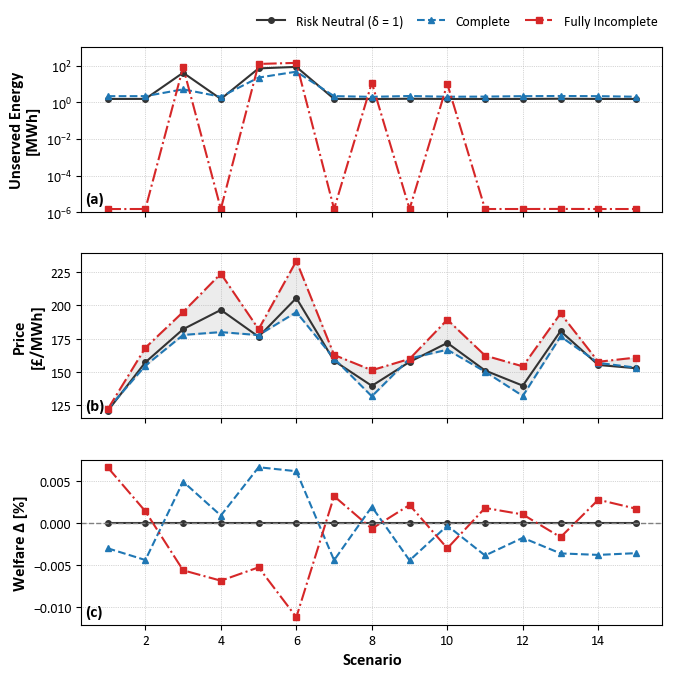

'\n# === Legend only at top subplot ===\n#axs[0].legend( loc=\'upper right\',frameon=True, ncol=1, prop=font_legend)\naxs[0].legend( frameon=True, ncol=1, prop=font_legend)\n\n# === Final Layout ===\nplt.tight_layout()\n\n# === Optional: Save as High-Res PDF ===\n# plt.savefig("market_comparison.pdf", dpi=300, bbox_inches=\'tight\')\n\nplt.show()\n'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['text.usetex'] = False
rcParams['axes.labelweight'] = 'bold'

# === Font Settings ===
font_label = {'fontsize': 12, 'fontweight': 'bold'}
font_tick = {'labelsize': 10}
font_legend = FontProperties(size=10)


scenarios = np.arange(1, 16)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = [
    120.8855,  # Scenario 1
    157.3509,  # Scenario 4
    182.1469,  # Scenario 7
    196.5904,  # Scenario 8
    176.4971,  # Scenario 11
    205.4936,  # Scenario 12
    158.4395,  # Scenario 13
    139.7145,  # Scenario 19
    157.6293,  # Scenario 22
    171.8752,  # Scenario 23
    151.2024,  # Scenario 24
    139.8418,  # Scenario 26
    180.7323,  # Scenario 27
    155.3469,  # Scenario 29
    152.9040   # Scenario 30
]

price_complete_050 = [
    122.2688,  # Scenario 1
    154.8055,  # Scenario 4
    177.8473,  # Scenario 7
    179.9779,  # Scenario 8
    177.7166,  # Scenario 11
    194.9383,  # Scenario 12
    160.1560,  # Scenario 13
    131.8733,  # Scenario 19
    160.1837,  # Scenario 22
    166.8051,  # Scenario 23
    150.3419,  # Scenario 24
    132.1367,  # Scenario 26
    176.7039,  # Scenario 27
    156.8883,  # Scenario 29
    153.3610   # Scenario 30
]
price_incomplete_050 = [
    122.0735,  # Scenario 1
    168.2576,  # Scenario 4
    195.0704,  # Scenario 7
    223.7529,  # Scenario 8
    182.1576,  # Scenario 11
    233.2616,  # Scenario 12
    162.8601,  # Scenario 13
    151.4084,  # Scenario 19
    159.887,  # Scenario 22
    189.293,  # Scenario 23
    162.3917,  # Scenario 24
    154.3101,  # Scenario 26
    193.9301,  # Scenario 27
    157.7401,  # Scenario 29
    160.9143   # Scenario 30
]

UE_risk_neutral = [
    1.5110558216630565,  # Scenario 1
    1.5163635270017153,  # Scenario 4
    40.641825409539244,  # Scenario 7
    1.5026785064877402,  # Scenario 8
    70.01389009326336,   # Scenario 11
    84.52377362180289,   # Scenario 12
    1.516365224640765,   # Scenario 13
    1.4838838513365857,  # Scenario 19
    1.5472605028005688,  # Scenario 22
    1.5027140814828428,  # Scenario 23
    1.502663795382098,   # Scenario 24
    1.5110671467129322,  # Scenario 26
    1.5472782128457752,  # Scenario 27
    1.5110735618782627,  # Scenario 29
    1.502664569462972    # Scenario 30
]
UE_complete_050 = [
    2.1370470956589216,  # Scenario 1
    2.1445191082245643,  # Scenario 4
    5.054340506309416,   # Scenario 7
    1.99279959312652,    # Scenario 8
    22.148770762349507,  # Scenario 11
    46.31399755663043,   # Scenario 12
    2.144671836768218,   # Scenario 13
    1.9682743600030292,  # Scenario 19
    2.1845031644582136,  # Scenario 22
    1.9929044956090465,  # Scenario 23
    2.0268083221990665,  # Scenario 24
    2.137317807152421,   # Scenario 26
    2.184862167243736,   # Scenario 27
    2.1376927272441435,  # Scenario 29
    1.9929760843497704   # Scenario 30
]
UE_incomplete_050 = [
    1.4898233544613504e-6,  # Scenario 1
    1.4992242540756706e-6,  # Scenario 4
    81.45781628327708,      # Scenario 7
    1.5031979572199816e-6,  # Scenario 8
    122.49970637416169,     # Scenario 11
    140.02363793605684,     # Scenario 12
    1.4966085117862349e-6,  # Scenario 13
    11.612643641136472,     # Scenario 19
    1.4967226533713074e-6,  # Scenario 22
    9.962164109593637,      # Scenario 23
    1.496907771070255e-6,   # Scenario 24
    1.4962664707240947e-6,  # Scenario 26
    1.5141126041839925e-6,  # Scenario 27
    1.4949436035749386e-6,  # Scenario 29
    1.4965974344249844e-6   # Scenario 30
]
W_risk_neutral = [
    4.7422553807927e9,  # Scenario 1
    4.7525930915920e9,  # Scenario 4
    4.6743476976288e9,  # Scenario 7
    4.7052799976890e9,  # Scenario 8
    4.6764844193831e9,  # Scenario 11
    4.6741894590257e9,  # Scenario 12
    4.7513907923682e9,  # Scenario 13
    4.6559026156878e9,  # Scenario 19
    4.8468131979312e9,  # Scenario 22
    4.7075188390584e9,  # Scenario 23
    4.7112691358883e9,  # Scenario 24
    4.7398262145105e9,  # Scenario 26
    4.8427033142304e9,  # Scenario 27
    4.7358331498133e9,  # Scenario 29
    4.7105709104475e9   # Scenario 30
]
W_complete_050 = [
    4.7421130404912e9,  # Scenario 1
    4.7523835677841e9,  # Scenario 4
    4.6745793209281e9,  # Scenario 7
    4.7053225640266e9,  # Scenario 8
    4.6767966508644e9,  # Scenario 11
    4.6744791501149e9,  # Scenario 12
    4.7511804895465e9,  # Scenario 13
    4.6559936251538e9,  # Scenario 19
    4.8465972683163e9,  # Scenario 22
    4.7075049379191e9,  # Scenario 23
    4.7110869939001e9,  # Scenario 24
    4.7397431031226e9,  # Scenario 26
    4.8425281709318e9,  # Scenario 27
    4.7356534341569e9,  # Scenario 29
    4.7104019573984e9   # Scenario 30
]
W_incomplete_050 = [
    4.7425715981096e9,  # Scenario 1
    4.7526602716978e9,  # Scenario 4
    4.6740843590744e9,  # Scenario 7
    4.7049565348836e9,  # Scenario 8
    4.6762373851001e9,  # Scenario 11
    4.6736641874266e9,  # Scenario 12
    4.7515436986588e9,  # Scenario 13
    4.6558717906229e9,  # Scenario 19
    4.8469183417419e9,  # Scenario 22
    4.7073772468243e9,  # Scenario 23
    4.7113545293541e9,  # Scenario 24
    4.7398752158371e9,  # Scenario 26
    4.8426220278029e9,  # Scenario 27
    4.7359655075111e9,  # Scenario 29
    4.710652092089e9    # Scenario 30
]

# === Styling Definitions ===
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Fully Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o'},
    'Complete': {'marker': '^'},
    'Fully Incomplete': {'marker': 's'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',
    'Fully Incomplete': '#d62728'
}



# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 7.5), sharex=True, gridspec_kw={'hspace': 0.25})


# === Plot Functions ===
def plot_ue(ax):
    ax.plot(scenarios, UE_risk_neutral, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, UE_complete_050, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, UE_incomplete_050, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    ax.set_yscale('log')
    ax.set_ylim(1e-6, 1e3)
    ax.set_ylabel("Unserved Energy\n[MWh]", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)

def plot_price_with_band(ax):
    ax.plot(scenarios, price_risk_neutral, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, price_complete_050, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, price_incomplete_050, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    lower = np.minimum(price_complete_050, price_incomplete_050)
    upper = np.maximum(price_complete_050, price_incomplete_050)
    ax.fill_between(scenarios, lower, upper, color='gray', alpha=0.15)
    ax.set_ylabel("Price\n[$/MWh]", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, linestyle=':', linewidth=0.5)

def plot_welfare_diff(ax):
    diff_risk = (np.array(W_risk_neutral) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100
    diff_complete = (np.array(W_complete_050) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100
    diff_incomplete = (np.array(W_incomplete_050) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100

    ax.plot(scenarios, diff_risk, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, diff_complete, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, diff_incomplete, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_ylabel("Welfare Δ [%]", **font_label)
    ax.set_xlabel("Scenario", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, linestyle=':', linewidth=0.5)

# === Plot Data ===
plot_ue(axs[0])
plot_price_with_band(axs[1])
plot_welfare_diff(axs[2])

# === Add Subplot Labels (a), (b), (c) ===
labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axs):
    ax.text(0.007, 0.12, labels[i], transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top', ha='left')

# === Collect Unique Legend Items ===
lines_labels = [ax.get_legend_handles_labels() for ax in axs]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
unique = dict(zip(labels, lines))  # Remove duplicates

# === Add Legend at Top-Right in 3 Columns ===
fig.legend(unique.values(), unique.keys(),
           loc='upper right', bbox_to_anchor=(0.91, 0.94),
           frameon=False, prop=font_legend, ncol=3, columnspacing=1.0)

# === Tight layout without extra margin at top ===
plt.tight_layout(rect=[0, 0, 1, 1])
# plt.savefig("market_comparison_with_legend_outside.pdf", dpi=300, bbox_inches='tight')
plt.savefig("market_comparison.png", dpi=400, bbox_inches='tight')
plt.show()


"""
# === Legend only at top subplot ===
#axs[0].legend( loc='upper right',frameon=True, ncol=1, prop=font_legend)
axs[0].legend( frameon=True, ncol=1, prop=font_legend)

# === Final Layout ===
plt.tight_layout()

# === Optional: Save as High-Res PDF ===
# plt.savefig("market_comparison.pdf", dpi=400, bbox_inches='tight')

plt.show()
"""

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


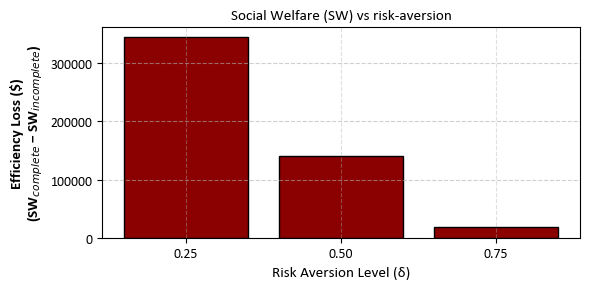

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Replace these with your actual values ===
deltas = [0.25, 0.5, 0.75]
sw_complete = [4.698138099955649e9, 4.708253166550986e9, 4.718352807262335e9]       # example social welfare values
sw_incomplete = [4.697793922383326e9, 4.70811321693767e9, 4.718335054032499e9]      # example values

eff_loss = np.array(sw_complete) - np.array(sw_incomplete)

# === Plotting ===
fig, ax = plt.subplots(figsize=(6, 3))

bars = ax.bar(deltas, eff_loss, width=0.2, color='#8B0000', edgecolor='black')

# Labels and grid
ax.set_ylabel("Efficiency Loss ($)\n(SW$_{complete}$ − SW$_{incomplete}$)", fontsize=11, fontweight='bold')
ax.set_xlabel("Risk Aversion Level (δ)", fontsize=11, fontweight='normal')
ax.set_xticks(deltas)
ax.set_xticklabels([f"{d:.2f}" for d in deltas])
ax.set_title("Social Welfare (SW) vs risk-aversion", fontsize=11)

# Gridlines on both axes
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.grid(True, axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig("socialwelfare.png", dpi=400, bbox_inches='tight')
plt.show()


In [297]:
import pandas as pd

# === Load your actual files ===
cf = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_capacity_factors_672_30yr_new_final_lf.csv")
demand = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_load_profiles_672_30yr_new_final.csv")
weights = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_weights_672_30yr_new_final.csv")

# === Reshape capacity factors to wide format ===
cf_wide = cf.pivot_table(index=["O", "T"], columns="G", values="value").reset_index()

# === Rename other columns ===
demand.rename(columns={"value": "demand"}, inplace=True)
weights.rename(columns={"value": "weight"}, inplace=True)

# === Merge all data on scenario (O) and time (T) ===
df = cf_wide.merge(demand, on=["O", "T"]).merge(weights, on=["O", "T"])

# === Compute weighted metrics per scenario ===
scenario_stats = []

for scenario in df["O"].unique():
    df_s = df[df["O"] == scenario]
    weight_sum = df_s["weight"].sum()

    windon_weighted = ((df_s["Wind_Onshore"]) * df_s["weight"]).sum() / weight_sum
    windoff_weighted = ((df_s["Wind_Offshore"]) * df_s["weight"]).sum() / weight_sum
    pv_weighted = (df_s["PV"] * df_s["weight"]).sum() / weight_sum
    demand_weighted = (df_s["demand"] * df_s["weight"]).sum()

    scenario_stats.append({
        "scenario": scenario,
        "windon_weighted": windon_weighted,
        "windoff_weighted": windoff_weighted,
        "pv_weighted": pv_weighted,
        "demand_weighted": demand_weighted
    })

stats_df = pd.DataFrame(scenario_stats)

stats_df.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\stats_for_scenario.csv", index=False)



Gas Utilisation

In [11]:
import pandas as pd
import numpy as np

# Load the dispatch and time weight files
dispatch_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\H2_high_duration\gas_dispatch_delta_0.5.csv")
time_weight_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_weights_672_30yr_new.csv")

# Prepare tail scenario set
tail_scenarios = {10,14,15,17,18,19,20,21,25,28,2,3,5,6,9}

# Merge time weights into dispatch data
time_weight_df = time_weight_df.rename(columns={"T": "Time", "O": "Scenario", "value": "TimeWeight"})
print(dispatch_df.columns)
# Filter for gas generator safely
gas_dispatch_df = dispatch_df.loc[dispatch_df["Generator"].str.lower() == "nuclear"].copy()

# Ensure correct data type for Scenario
gas_dispatch_df["Scenario"] = gas_dispatch_df["Scenario"].astype(int)

# Merge with time weights
merged_df = gas_dispatch_df.merge(time_weight_df, on=["Time", "Scenario"], how="left")


merged_df["IsTail"] = merged_df["Scenario"].isin(tail_scenarios)

# Compute weighted dispatch
merged_df["WeightedDispatch"] = merged_df["Dispatch"] * merged_df["TimeWeight"]

# Aggregates and gas capacity
tail_dispatch = merged_df.loc[merged_df["IsTail"], "WeightedDispatch"].sum()
non_tail_dispatch = merged_df.loc[~merged_df["IsTail"], "WeightedDispatch"].sum()

total_hours_tail = merged_df.loc[merged_df["IsTail"], "TimeWeight"].sum()
total_hours_non_tail = merged_df.loc[~merged_df["IsTail"], "TimeWeight"].sum()

gas_capacity_mw = 3.999999
avg_mw_tail = tail_dispatch / total_hours_tail
avg_mw_non_tail = non_tail_dispatch / total_hours_non_tail
utilization_tail = avg_mw_tail / gas_capacity_mw
utilization_non_tail = avg_mw_non_tail / gas_capacity_mw

print({
    "Tail Dispatch (MWh)": tail_dispatch,
    "Non-Tail Dispatch (MWh)": non_tail_dispatch,
    "Avg MW Tail": avg_mw_tail,
    "Avg MW Non-Tail": avg_mw_non_tail,
    "Utilization Tail (%)": utilization_tail * 100,
    "Utilization Non-Tail (%)": utilization_non_tail * 100
})


Index(['Time', 'Scenario', 'Generator', 'Dispatch'], dtype='object')
{'Tail Dispatch (MWh)': 492156.48739765654, 'Non-Tail Dispatch (MWh)': 496295.4697001864, 'Avg MW Tail': 3.745483161321587, 'Avg MW Non-Tail': 3.776982265602636, 'Utilization Tail (%)': 93.6371024423153, 'Utilization Non-Tail (%)': 94.42458024621097}


In [6]:
import pandas as pd
import numpy as np

# Load the dispatch and time weight files
df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\my_hpc_project_riskaverseCON_CPLEX\prices_delta_0.5.csv")
# Group by scenario and compute stats
stats = df.groupby("O")["price"].agg(
    avg_price="mean",
    std_price="std",
    min_price="min",
    max_price="max"
).reset_index()

# Save to a new CSV (optional)
stats.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\my_hpc_project_riskaverseCON_CPLEX\scenario_price_stats.csv", index=False)
# Display result
print(stats)

     O   avg_price   std_price    min_price    max_price
0    1  -92.415409  301.631163 -5506.241616     0.002468
1    2  -83.741818   87.115456 -1538.747856     0.000326
2    3 -130.693111  558.311685 -7174.356202     0.001287
3    4  -87.415104   65.158790  -471.985478    -0.000727
4    5  -83.292809  203.042581 -4998.012318     0.000290
5    6  -74.593552   67.137158  -381.861325     0.001177
6    7 -100.731669  373.831197 -8998.617740     0.005556
7    8  109.940133  230.367473     0.001100  2951.112739
8    9   74.022911   67.476439    -0.001404   364.001419
9   10   86.636250  213.793968    -0.000791  5335.802815
10  11   97.956290  304.861787     0.000355  7802.504080
11  12  107.904334  319.004073    -0.002740  5904.166880
12  13   96.568151  148.690778     0.001793  2903.997916
13  14  105.662751  329.077378    -0.001289  7000.894498
14  15  103.087852  349.178257    -0.000272  8284.161060
15  16   93.930756  181.975261     0.001851  4504.922401
16  17   87.523139  201.144475 